In [1]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

In [2]:
#
import math
import os
from pathlib import Path

In [3]:
columns_ordered = ([
'duration','protocol_type','service','flag','src_bytes','dst_bytes',
'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login',
'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
])
cat_cols = ['protocol_type', 'service', 'flag']
cont_cols = [
    'duration','src_bytes','dst_bytes','wrong_fragment',
    'urgent','hot', 'num_failed_logins','num_compromised','num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds', 'count','srv_count','serror_rate',
    'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
]
disc_cols = ['land', 'logged_in','root_shell','su_attempted', 'is_host_login','is_guest_login']
columns = [*cat_cols, *cont_cols, *disc_cols]
labels_cols = ['attack', 'attack_type']
len(columns)

41

In [4]:
attacks_types = {
  'normal': 'normal',
  'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l',
}

attack_families = ['normal', 'dos', 'u2r', 'r2l', 'probe']

In [5]:
# Total rows: 494021 (This is 10% data)
root_path = Path(os.path.abspath(""))
data_path = os.path.join(root_path.parent.parent, 'data', 'kdd_cup','KDD_Data', 'kddcup_testdata.csv')
# df = pd.read_csv(data_path, names=[*columns,'attack'], nrows=1000)
df = pd.read_csv(data_path, names=[*columns_ordered,'attack'])
# df['attack'] = df['attack'].apply(lambda r: r[:-1])
# df['attack_type'] = df['attack'].apply(lambda r:attacks_types[r])
df.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp  private   SF        105        146     0   
1         0           udp  private   SF        105        146     0   
2         0           udp  private   SF        105        146     0   
3         0           udp  private   SF        105        146     0   
4         0           udp  private   SF        105        146     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   1   
1               0       0    0  ...                 254   
2               0       0    0  ...                 254   
3               0       0    0  ...                 254   
4               0       0    0  ...                 254   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                    0.00   
1                     1.0                    0.01   
2                     1.0                    0.01   
3                     1.0                    0.01   
4                     1.0                    0.01   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         1.00                          0.0   
1                         0.00                          0.0   
2                         0.00                          0.0   
3                         0.00                          0.0   
4                         0.01                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  attack  
0                       0.0     NaN  
1                       0.0     NaN  
2                       0.0     NaN  
3                       0.0     NaN  
4                       0.0     NaN  

[5 rows x 42 columns]

In [6]:
cat_cols = []
for col in df.columns:
    try :
        df[col] = df[col].astype(float)
    except:
        df[col] = df[col].astype('category')
        cat_cols.append(col)
cat_cols

['protocol_type', 'service', 'flag']

## Categorical columns

In [18]:
df.describe(include=['category'])

protocol_type  service     flag
count        2984154  2984154  2984154
unique             3       70       11
top             icmp    ecr_i       SF
freq         1648735  1642609  2369632

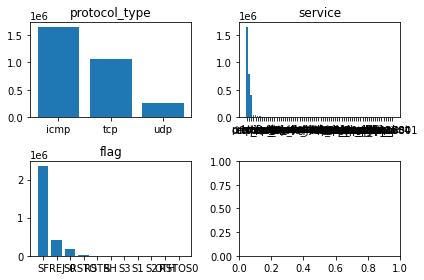

In [19]:
cols = 2
rows = math.ceil(len(cat_cols) / 2)
fig, axs = plt.subplots(rows, cols)

for (i, cat_col) in enumerate(cat_cols):
    g_c = i % cols
    g_r = int(i /cols)
    vc = df[cat_col].value_counts()
    axs[g_r, g_c].bar(vc.index, vc.values)
    axs[g_r, g_c].set_title(cat_col)
fig.tight_layout()

<AxesSubplot:>

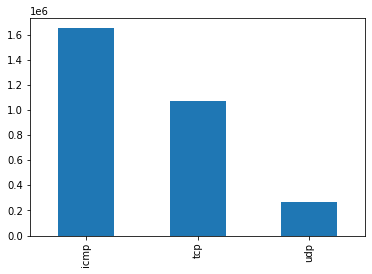

In [20]:
# Protocol type
df[cat_cols[0]].value_counts().plot(kind='bar')

<AxesSubplot:>

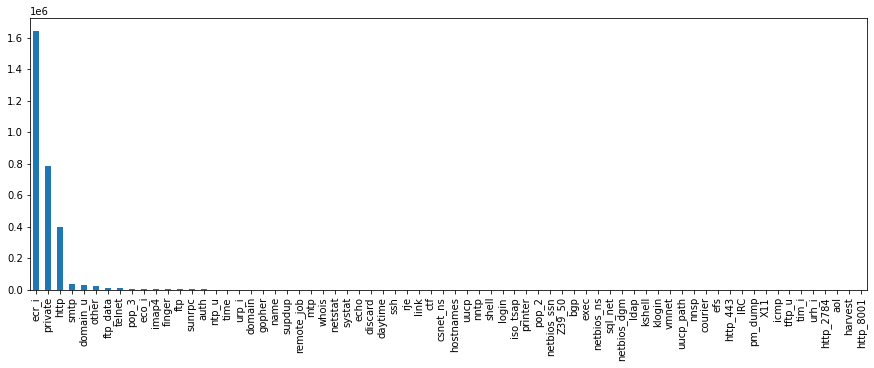

In [21]:
# Service
df[cat_cols[1]].value_counts().plot(kind='bar', figsize=(15,5))

<AxesSubplot:>

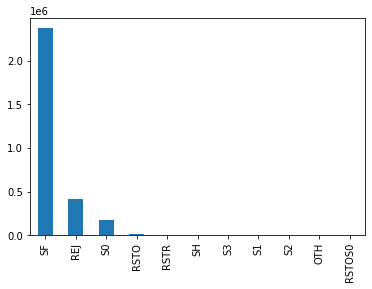

In [22]:
# Flag
df[cat_cols[2]].value_counts().plot(kind='bar')

In [23]:
# NO LABELS

## Numerical columns

### Discrete Numerical distributions

land
0    2984145
1          9
Name: land, dtype: int64
logged_in
0    2545267
1     438887
Name: logged_in, dtype: int64
root_shell
0    2983916
1        238
Name: root_shell, dtype: int64
su_attempted
0    2984121
2         18
1         15
Name: su_attempted, dtype: int64
is_host_login
0    2984136
1         18
Name: is_host_login, dtype: int64
is_guest_login
0    2982231
1       1923
Name: is_guest_login, dtype: int64


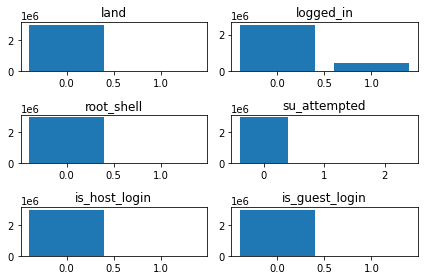

In [8]:
cols = 2
rows = math.ceil(len(disc_cols) / 2)
fig, axs = plt.subplots(rows, cols)

for (i, disc_col) in enumerate(disc_cols):
    g_c = i % cols
    g_r = int(i /cols)
    vc = df[disc_col].value_counts()
    axs[g_r, g_c].bar(vc.index, vc.values)
    axs[g_r, g_c].set_title(disc_col)
    print(disc_col)
    print(vc)
fig.tight_layout()

### Continuous

In [14]:
cont_cols_1 = cont_cols[0:len(cont_cols)//2]
cont_cols_2 = cont_cols[len(cont_cols_1):]
print(len(cont_cols))
print(len(cont_cols_1))
print(len(cont_cols_2))
assert [*cont_cols_1, *cont_cols_2] == cont_cols
[*cont_cols_1, *cont_cols_2] == cont_cols

32
16
16


True

/home/maklins/Programation/TFM/cyberai/venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


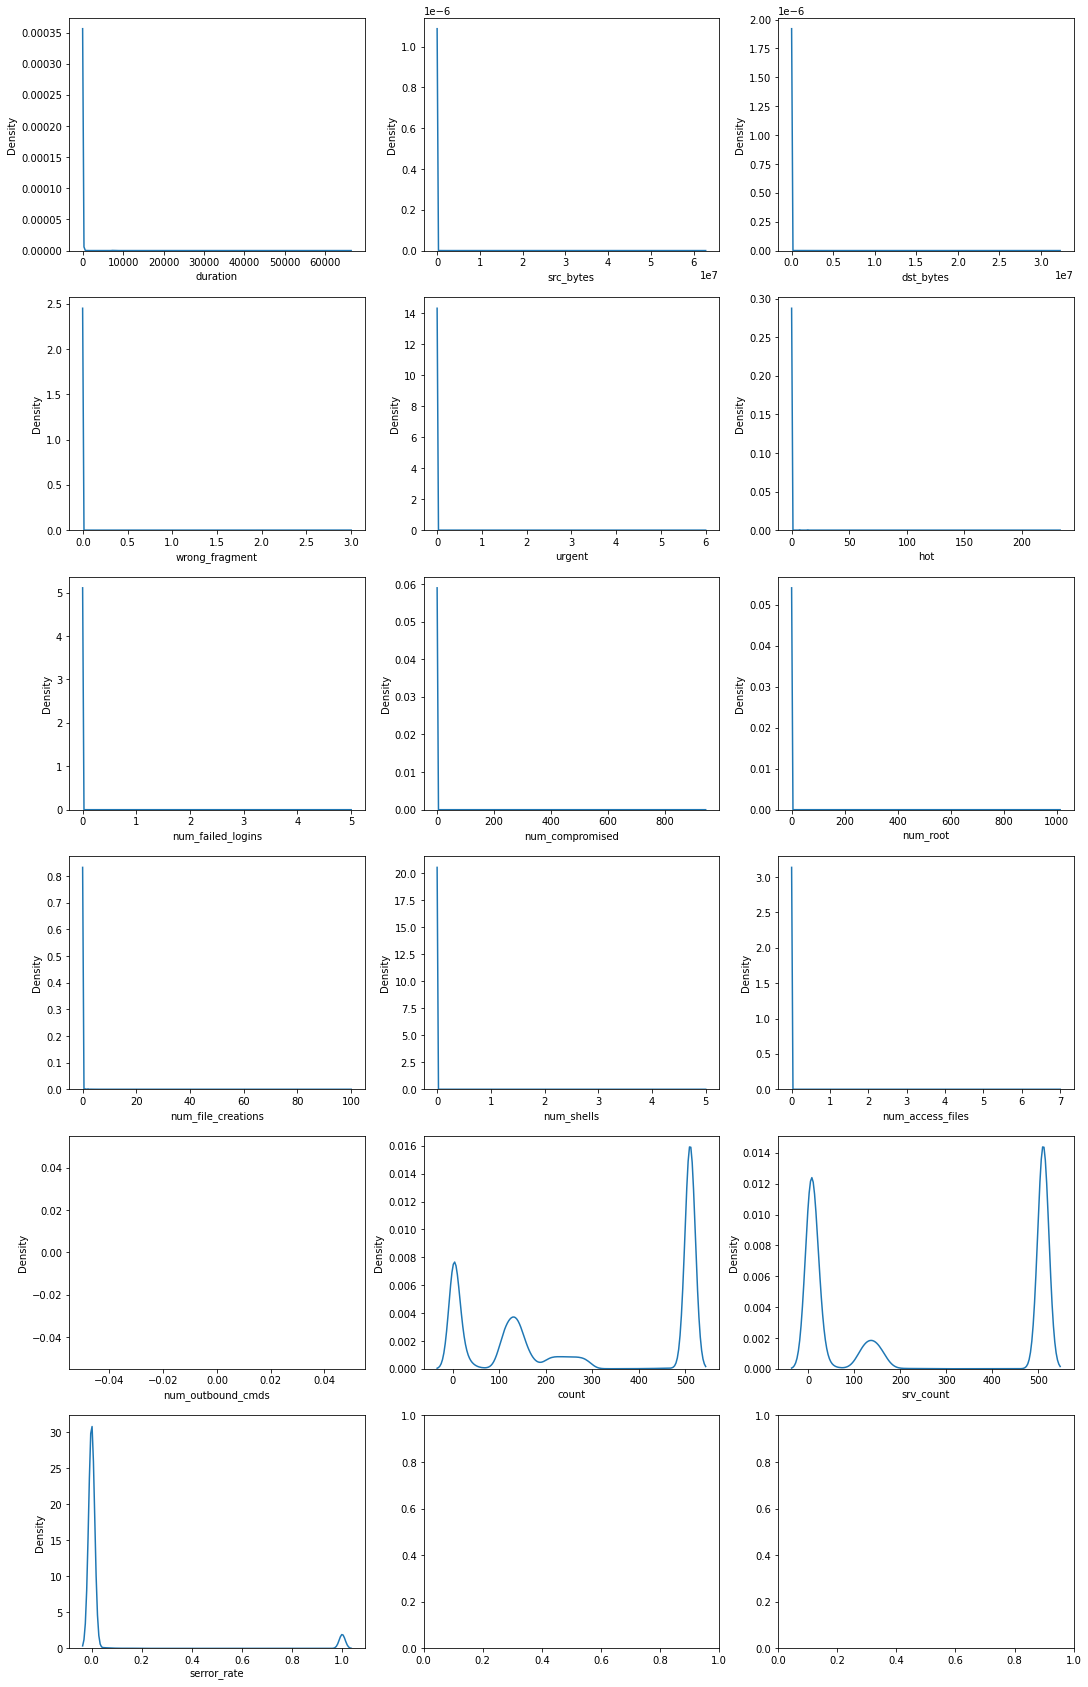

In [9]:
cols = 3
rows = math.ceil(len(cont_cols_1) / cols)
fig, axs = plt.subplots(nrows=rows,ncols=cols,figsize=(18,30))

for i, nc in enumerate(cont_cols_1):
    _col = i % cols
    _row = int(i / cols)
    sns.kdeplot(data=df, x=nc, ax=axs[_row][_col])
    # sns.histplot(data=df, x=nc, ax=axs[_row][_col])
plt.show()

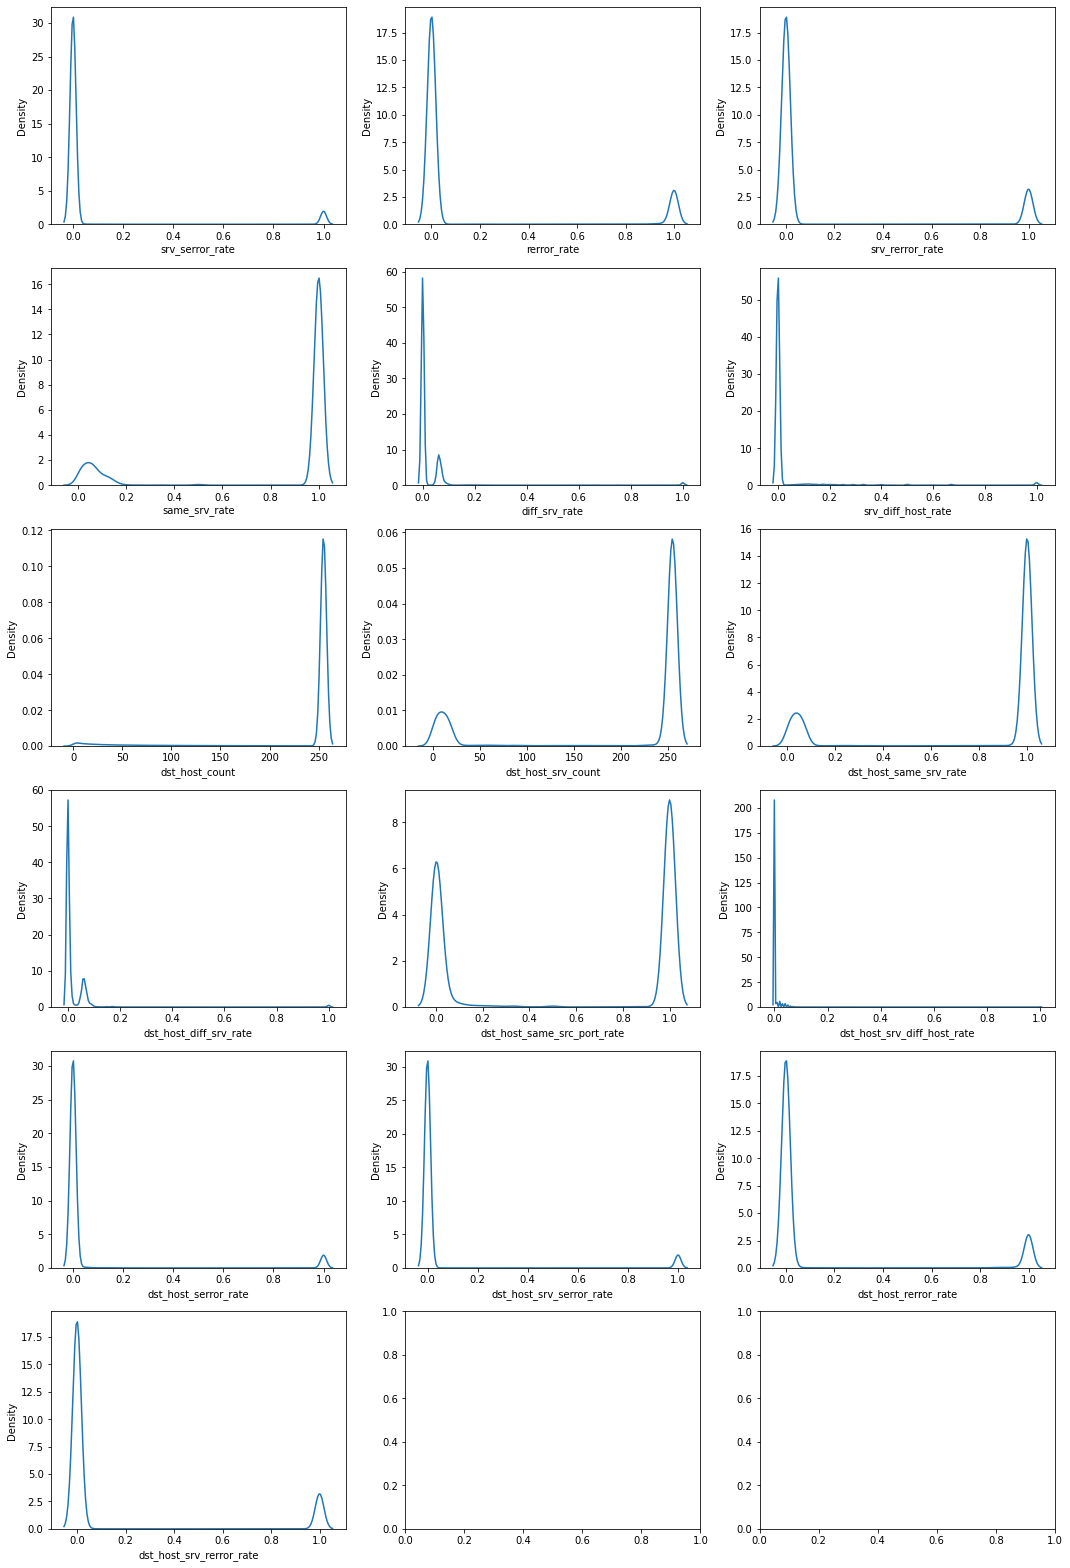

In [16]:
cols = 3
rows = math.ceil(len(cont_cols_2) / cols)
fig, axs = plt.subplots(nrows=rows,ncols=cols,figsize=(18,28))

for i, nc in enumerate(cont_cols_2):
    _col = i % cols
    _row = int(i / cols)
    sns.kdeplot(data=df, x=nc, ax=axs[_row][_col])
    # sns.histplot(data=df, x=nc, ax=axs[_row][_col])
plt.show()

## Numerical Correlation

In [24]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values


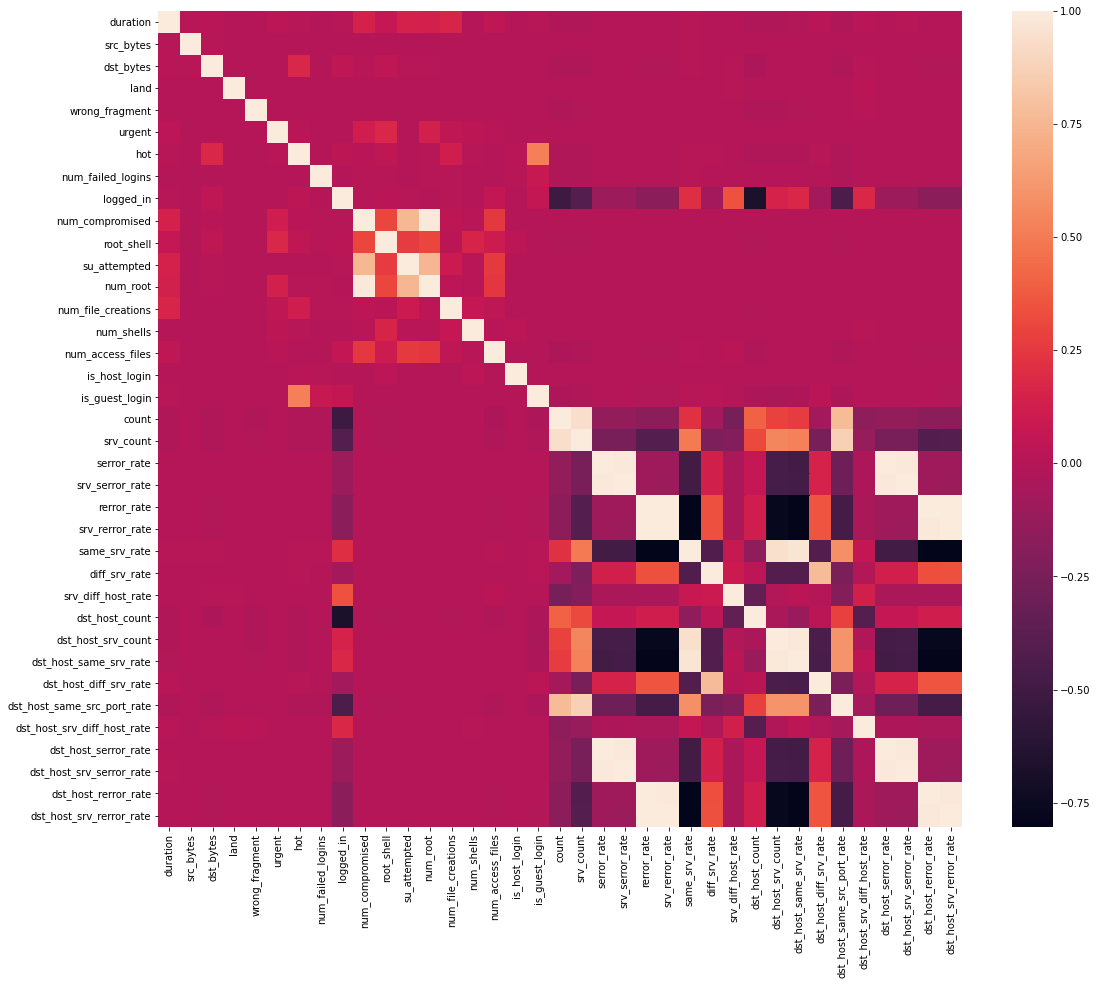

In [25]:
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr)#,annot=True
plt.show()

## Conitnuous columns

In [ ]:
cols = 3
rows = math.ceil(len(cont_cols) / cols)
fig, axs = plt.subplots(rows,cols)
for i, nc in enumerate(cont_cols):
    _col = i % cols
    _row = int(i / cols)
    sns.kdeplot(data=df, x=nc, ax=axs[_row][_col])
    # sns.histplot(data=df, x=nc, ax=axs[_row][_col])
plt.show()